## Assignment 3


###  House prices model

In this exercise, you'll interpret your house prices model. To complete this assignment, submit a link to a Jupyter notebook containing your solutions to the following tasks:

* Load the **houseprices** data from Thinkful's database.
* Run your house prices model again and interpret the results. Which features are statistically significant, and which are not?
* Now, exclude the insignificant features from your model. Did anything change?
* Interpret the statistically significant coefficients by quantifying their relations with the house prices. Which features have a more prominent effect on house prices?
* Do the results sound reasonable to you? If not, try to explain the potential reasons.

**Load the houseprices data from Thinkful's database**

In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
import matplotlib.pyplot as plt
import statsmodels.api as sm

from sqlalchemy import create_engine

import warnings
warnings.filterwarnings('ignore')

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'houseprices'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

houses_df = pd.read_sql_query('select * from houseprices',con=engine)

# no need for an open connection, as we're only doing a single query
engine.dispose()

In [30]:
houses_df = pd.concat([houses_df,pd.get_dummies(houses_df.mszoning, prefix="mszoning", drop_first=True)], axis=1)
houses_df = pd.concat([houses_df,pd.get_dummies(houses_df.street, prefix="street", drop_first=True)], axis=1)
dummy_column_names = list(pd.get_dummies(houses_df.mszoning, prefix="mszoning", drop_first=True).columns)
dummy_column_names = dummy_column_names + list(pd.get_dummies(houses_df.street, prefix="street", drop_first=True).columns)



In [31]:
new_houses = houses_df[['saleprice','overallqual', 'grlivarea', 'garagecars', 'garagearea', 'totalbsmtsf'] + dummy_column_names]

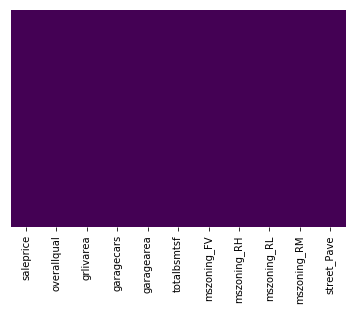

In [32]:
#Verifying if there are some missing values

nonclean = ((new_houses.isnull().sum()*100)/houses_df.saleprice.count())

for value,index in zip(nonclean,nonclean.index):
    if value > 0:
        print('Column: {} with {}% of null values'.format(index,value))


#Cleaning garageyrblt by replacing missing values in a column with a value from yearremodadd because they are high correlated.

sns.heatmap(new_houses.isnull(),yticklabels=False,cbar=False,cmap='viridis')




**Run your house prices model again and interpret the results. Which features are statistically significant, and which are not?**

In [33]:
#Creating feature set for X

featureset = list(new_houses.columns)
featureset.remove('saleprice')

# Y is the target variable
Y = new_houses['saleprice']

X = new_houses[featureset]

# We add a constant to the model as it's a best practice
# to do so every time!
X = sm.add_constant(X)

# We fit an OLS model using statsmodels
results = sm.OLS(Y, X).fit()

# We print the summary results
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:              saleprice   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     482.0
Date:                Mon, 12 Aug 2019   Prob (F-statistic):               0.00
Time:                        15:38:21   Log-Likelihood:                -17475.
No. Observations:                1460   AIC:                         3.497e+04
Df Residuals:                    1449   BIC:                         3.503e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.173e+05    1.8e+04     -6.502      

**Which features are statistically significant, and which are not?**


- overallqual	**statistically significant**
- grlivarea	**statistically significant**
- garagecars	**statistically significant**
- garagearea	**statistically non significant**
- totalbsmtsf	**statistically significant**
- mszoning_FV	**statistically significant**
- mszoning_RH	**statistically non significant**
- mszoning_RL	**statistically significant**
- mszoning_RM	**statistically non significant**
- street_Pave	**statistically non significant**


**Now, exclude the insignificant features from your model. Did anything change?**

In [34]:
#Creating feature set for X

featureset = list(new_houses.columns)

#Excluding insignificant features:

featureset.remove('saleprice')
featureset.remove('garagearea')
featureset.remove('mszoning_RH')
featureset.remove('mszoning_RM')
featureset.remove('street_Pave')

# Y is the target variable
Y = new_houses['saleprice']

X = new_houses[featureset]

# We add a constant to the model as it's a best practice
# to do so every time!
X = sm.add_constant(X)

# We fit an OLS model using statsmodels
results = sm.OLS(Y, X).fit()

# We print the summary results
print(results.summary())



                            OLS Regression Results                            
Dep. Variable:              saleprice   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     803.3
Date:                Mon, 12 Aug 2019   Prob (F-statistic):               0.00
Time:                        15:38:31   Log-Likelihood:                -17476.
No. Observations:                1460   AIC:                         3.497e+04
Df Residuals:                    1453   BIC:                         3.500e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.087e+05   4792.537    -22.674      

_The constant and some coefficients changed_

**Interpret the statistically significant coefficients by quantifying their relations with the house prices. Which features have a more prominent effect on house prices?**

- Holding all other features fixed, a 1 unit increase in overallqual is associated with an increase of 2.332e+04 on saleprice

- Holding all other features fixed, a 1 unit increase in grlivarea is associated with an increase of 45.9659 on saleprice

- Holding all other features fixed, a 1 unit increase in garagecars is associated with an increase of 1.721e+04 on saleprice

- Holding all other features fixed, a 1 unit increase in totalbsmtsf is associated with an increase of 29.3276 on saleprice

- Holding all other features fixed, a 1 unit increase in mszoning_FV is associated with an increase of 1.679e+04 on saleprice

- Holding all other features fixed, a 1 unit increase in mszoning_RL is associated with an increase of 1.968e+04 on saleprice

Features which more prominent effect on house prices are: **overallqual,garagecars and mszoning_RL**

**Do the results sound reasonable to you? If not, try to explain the potential reasons**

Yes, they do. The overall material and finish quality (overallqual), the size of garage in car capacity (garagecars) and the zone residential low density (mszoning_RL) usually are factors to determine price sale.

---------------------------------------------------

By: Wendy Navarrete

12/08/2019
